### Questions about the dataset:
1. What is the number of tracks in each gener, and how popularity each genre is?
2. What is the mean tracks duration of each genre?
3. Does the track's duration can indicates it's popularity?
4. what is the correlation between different features? does one can indicates the other?

In [134]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random

In [135]:
spotify_data = pd.read_csv(r'SpotifyFeatures.csv')

In [136]:
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Data Cleaning

In [137]:
# no null values
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [138]:
spotify_data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [139]:
# duplicate values

duplicate_rows = spotify_data[spotify_data.duplicated(subset='track_id')]
print("There are {} duplicae values".format(len(duplicate_rows)))

There are 55951 duplicae values


In [140]:
# Looking at one of the tracks which has duplicate valuees, there are 5 (!) different rows for the same track! 

spotify_data[spotify_data['track_id'] == duplicate_rows.iloc[0]['track_id']]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
77710,Children’s Music,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
93651,Indie,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
113770,Pop,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


In [141]:
spotify_data = spotify_data.drop_duplicates(subset='track_id')
print("I dropped {} tracks, now the data set contains {} tracks".format(len(duplicate_rows), len(spotify_data)))

I dropped 55951 tracks, now the data set contains 176774 tracks


In [142]:
# Now there is only one

spotify_data[spotify_data['track_id'] == '6iOvnACn4ChlAw4lWUU4dd']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


### Exploring and Visuallization

In [61]:
spotify_data['genre'].nunique()

27

In [62]:
spotify_data['popularity'].nunique()

101

In [63]:
# converting duration from miliseconds to minutes
spotify_data['duration_minutes'] = spotify_data['duration_ms'].apply(lambda x: x / 60000)

In [64]:
spotify_data['duration_minutes']

0         1.656217
1         2.289550
2         2.837783
3         2.540450
4         1.377083
            ...   
232716    3.711117
232717    3.352883
232719    2.411117
232721    4.707450
232724    5.383783
Name: duration_minutes, Length: 176774, dtype: float64

In [65]:
print("Longest track: {}".format(max(spotify_data['duration_minutes'])))
print("Shortest track: {}".format(min(spotify_data['duration_minutes'])))

Longest track: 92.54861666666666
Shortest track: 0.25645


In [66]:
print("Highest popularity value: {}".format(max(spotify_data['popularity'])))
print("Lowest popularity value: {}".format(min(spotify_data['popularity'])))

Highest popularity value: 100
Lowest popularity value: 0


In [67]:
track_with_longest_duration = spotify_data[spotify_data['duration_minutes'] == max(spotify_data['duration_minutes'])]
track_with_longest_duration

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_minutes
212083,Comedy,La Mesa Reñoña,"Episodio 15 (Lady Orinoco, Políticas De Youtub...",76vVk4HCOLP5r7hA53SyXg,22,0.846,0.468,5552917,0.58,0.0,C,0.138,-11.615,Major,0.412,72.69,3/4,0.801,92.548617


In [68]:
track_with_highest_popularity = spotify_data[spotify_data['popularity'] == max(spotify_data['popularity'])]
track_with_highest_popularity

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_minutes
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578,0.725,178640,0.321,0.0,C#,0.0884,-10.744,Minor,0.323,70.142,4/4,0.319,2.977333


                  how many
genre                     
A Capella              119
Children’s Music      1339
Rap                   1456
Rock                  2227
Pop                   2417
Indie                 3318
Soul                  4430
R&B                   5353
Children's Music      5402
Country               7383
Hip-Hop               7413
Movie                 7802
World                 7973
Dance                 7982
Ska                   8017
Jazz                  8039
Folk                  8048
Opera                 8280
Soundtrack            8480
Blues                 8496
Reggaeton             8549
Reggae                8687
Classical             8711
Anime                 8935
Alternative           9095
Electronic            9149
Comedy                9674


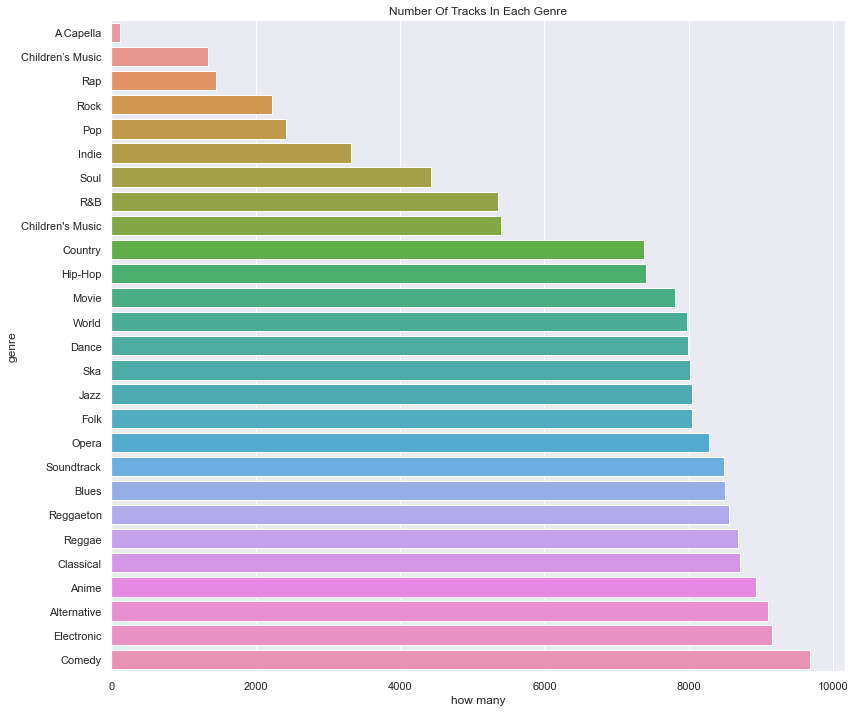

In [69]:
# Genre with the highest number of tracks

number_of_tracks_by_genre = pd.DataFrame(data=spotify_data.groupby('genre').size(),columns=['how many']).sort_values(
    by='how many')
print(number_of_tracks_by_genre)

plt.figure(figsize=(12,10))
sns.barplot(x='how many',y=number_of_tracks_by_genre.index,data=number_of_tracks_by_genre).set(
    title="Number Of Tracks In Each Genre")

plt.tight_layout()
plt.show()

                  popularity
genre                       
Children's Music    4.245650
A Capella           9.302521
Movie              12.146629
Opera              13.335628
Comedy             21.320240
Anime              24.256184
Ska                27.441063
Classical          29.320170
Soundtrack         33.681958
Blues              33.683851
World              34.416029
Reggae             35.390123
Reggaeton          36.480290
Electronic         37.592305
Jazz               39.885060
Soul               43.491874
Country            44.248679
R&B                48.463665
Folk               49.671347
Alternative        50.257944
Children’s Music   52.302465
Indie              53.528933
Dance              57.351541
Hip-Hop            58.516660
Rock               58.767849
Rap                59.515797
Pop                67.064957


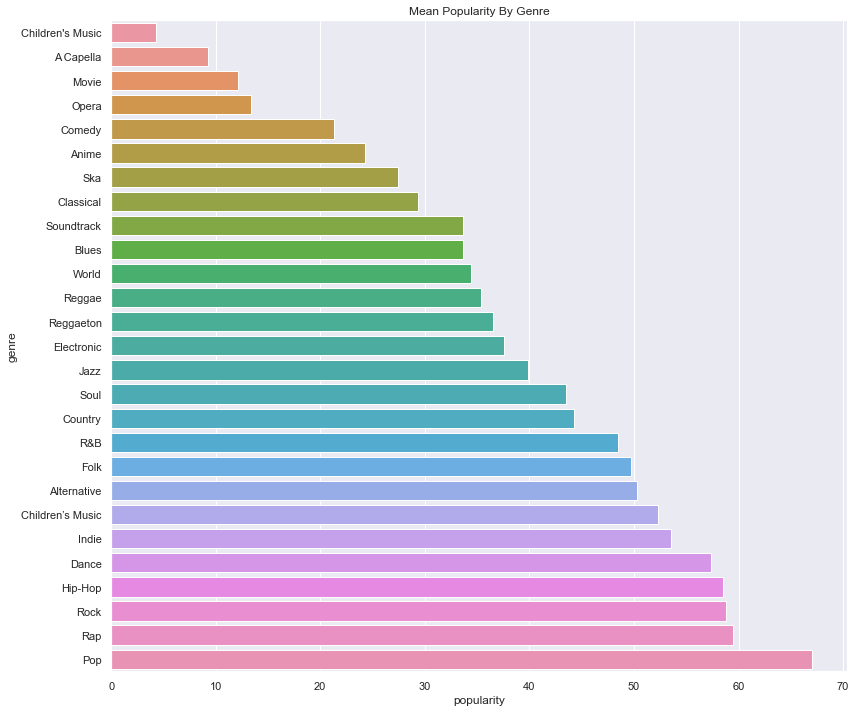

In [70]:
# Popularity of each genre

mean_popularity_by_genre = pd.DataFrame(data=spotify_data.groupby('genre')['popularity'].mean()).sort_values(
    by='popularity')
print(mean_popularity_by_genre)

plt.figure(figsize=(12,10))
sns.barplot(x='popularity',y=mean_popularity_by_genre.index,data=mean_popularity_by_genre).set(
    title="Mean Popularity By Genre")

plt.tight_layout()
plt.show()

In [71]:
popularity_how_many_df = number_of_tracks_by_genre.join(mean_popularity_by_genre)
popularity_how_many_df

,how many,popularity
genre,,
A Capella,119,9.302521
Children’s Music,1339,52.302465
Rap,1456,59.515797
Rock,2227,58.767849
Pop,2417,67.064957
Indie,3318,53.528933
Soul,4430,43.491874
R&B,5353,48.463665
Children's Music,5402,4.245650


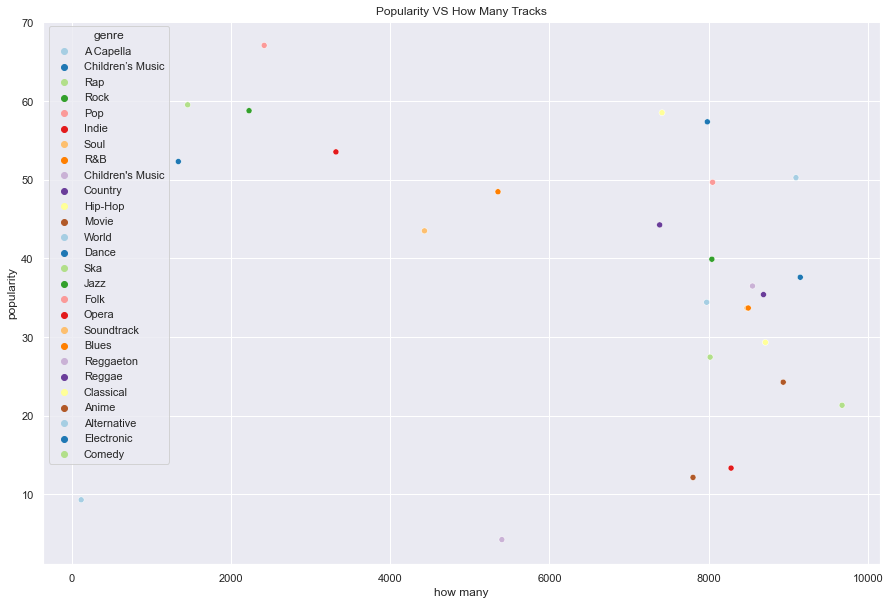

In [72]:
sns.set()

plt.figure(figsize=(15,10))
sns.scatterplot(x='how many', y='popularity',data=popularity_how_many_df, palette='Paired', hue='genre').set(
    title="Popularity VS How Many Tracks")

plt.show()

                  duration_minutes
genre                             
Children's Music          2.378989
Ska                       3.151135
Soundtrack                3.181399
Rap                       3.366296
A Capella                 3.407795
Movie                     3.506913
Indie                     3.599737
Country                   3.614379
Hip-Hop                   3.623611
Pop                       3.641522
Dance                     3.739667
R&B                       3.775029
Anime                     3.832383
Soul                      3.841067
Reggaeton                 3.868868
Children’s Music          3.873166
Alternative               3.883521
Folk                      3.899844
Comedy                    3.922373
Reggae                    3.990310
Rock                      4.095494
Blues                     4.208560
Opera                     4.319352
Jazz                      4.426453
Electronic                4.485801
Classical                 5.215806
World               

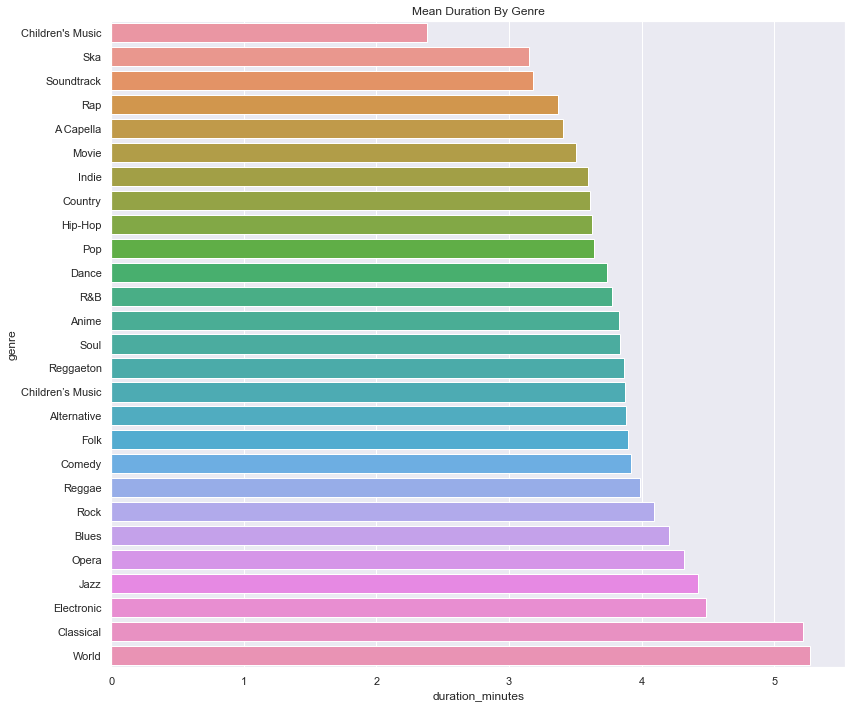

In [73]:
# mean duration of each genre

mean_duration_by_genre = pd.DataFrame(spotify_data.groupby('genre')['duration_minutes'].mean()).sort_values(
    by='duration_minutes')
print(mean_duration_by_genre)

plt.figure(figsize=(12,10))
sns.barplot(x='duration_minutes',y=mean_duration_by_genre.index,data=mean_duration_by_genre).set(
    title="Mean Duration By Genre")

plt.tight_layout()
plt.show()

In [74]:
# duration vs popularity
popularity_duration_df = mean_popularity_by_genre.join(mean_duration_by_genre)
popularity_duration_df

,popularity,duration_minutes
genre,,
Children's Music,4.245650,2.378989
A Capella,9.302521,3.407795
Movie,12.146629,3.506913
Opera,13.335628,4.319352
Comedy,21.320240,3.922373
Anime,24.256184,3.832383
Ska,27.441063,3.151135
Classical,29.320170,5.215806
Soundtrack,33.681958,3.181399


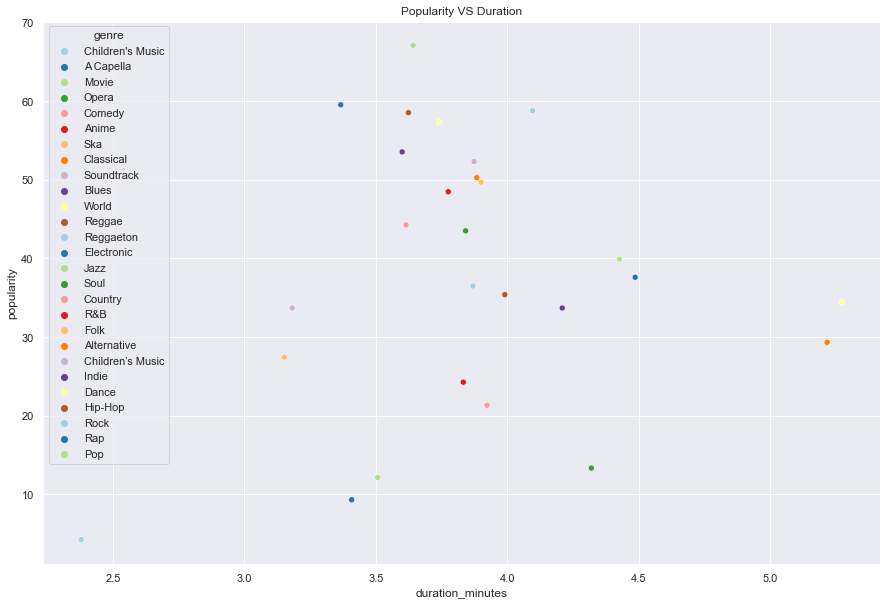

In [75]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='duration_minutes', y='popularity',data=popularity_duration_df, palette='Paired', hue='genre').set(
    title="Popularity VS Duration")

plt.show()

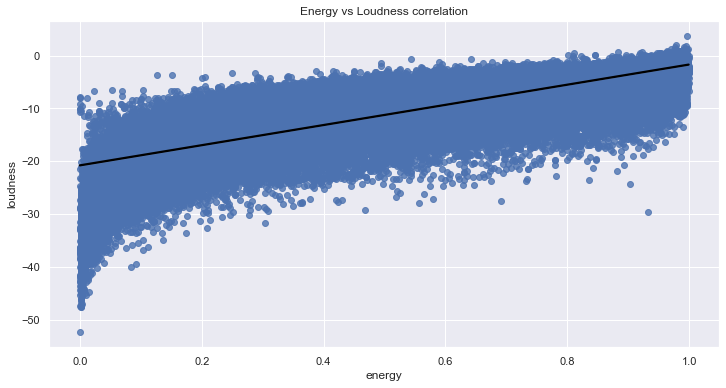

In [76]:
# loudness vs energy correlation

plt.figure(figsize=(12,6))
sns.regplot(x='energy', y='loudness', data=spotify_data,
           line_kws={"color": "black"}).set(title="Energy vs Loudness correlation")

plt.show()

# there is correlation- linear line

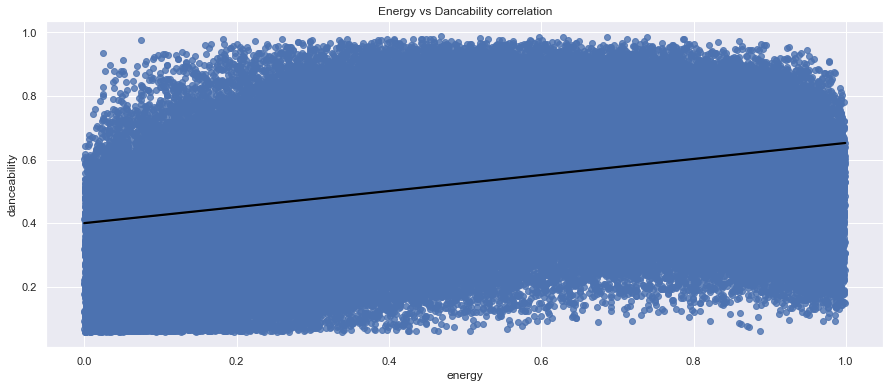

In [77]:
# danceability vs energy correlation

plt.figure(figsize=(15,6))
sns.regplot(x='energy', y='danceability', data=spotify_data,
           line_kws={"color": "black"}).set(title="Energy vs Dancability correlation")

plt.show()

# there is correlation- linear line
# wide distribution

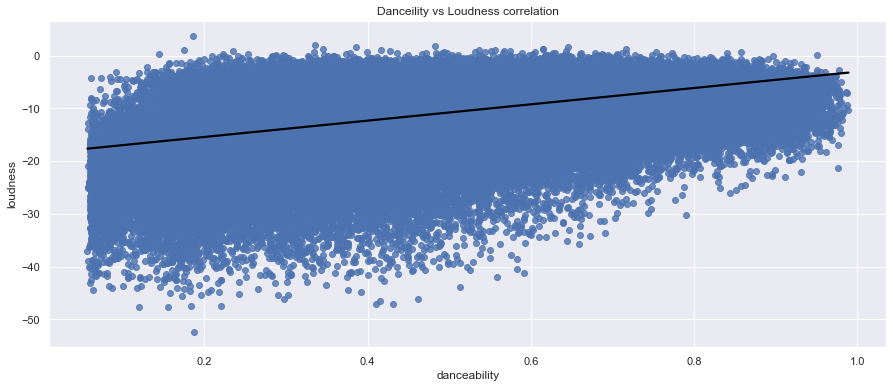

In [78]:
# danceility vs loudness correlation

plt.figure(figsize=(15,6))
sns.regplot(x='danceability', y='loudness', data=spotify_data,
           line_kws={"color": "black"}).set(title="Danceility vs Loudness correlation")

plt.show()

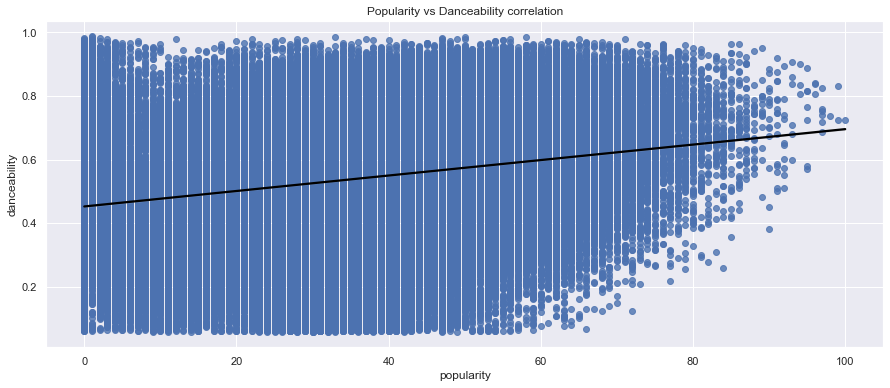

In [79]:
# popularity vs danceability

plt.figure(figsize=(15,6))
sns.regplot(x='popularity', y='danceability', data=spotify_data,
           line_kws={"color": "black"}).set(title="Popularity vs Danceability correlation")

plt.show()

# danceability does not indicate popularity